Line-level text & document metadata extraction

In [ ]:
!pip -q install pdfplumber pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.2 MB/s eta 0:00:00


In [ ]:
import pdfplumber
from pypdf import PdfReader

print("pdfplumber:", pdfplumber.__version__)
print("pypdf imported successfully")

pdfplumber: 0.11.9
pypdf imported successfully


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving table.pdf to table.pdf


In [ ]:
pdf_path = next(iter(uploaded.keys()))
pdf_path

'table.pdf'

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    print("Pages:", len(pdf.pages))

Pages: 1


In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    print("Page size:", page.width, page.height)

Page size: 612.0 792.0


In [ ]:
# bbox = (x0, top, x1, bottom)
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    bbox = (0, 110, page.width, 420)

bbox

(0, 110, 612, 420)

In [ ]:
import pdfplumber
import pandas as pd

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    cropped = page.crop(bbox)

    chars = cropped.chars  # list of character-level objects with metadata

print("Total chars inside bbox:", len(chars))

# Show a few raw examples
chars[:5]

Total chars inside bbox: 1020


[{'matrix': (14.0, 0.0, 0.0, 14.0, 54.0, 671.09492),
  'fontname': 'FNCIUM+Verdana-Bold',
  'adv': 0.682,
  'upright': True,
  'x0': 54.0,
  'y0': 668.18292,
  'x1': 63.548,
  'y1': 682.18292,
  'width': 9.548000000000002,
  'height': 13.817080000000033,
  'size': 14.0,
  'mcid': None,
  'tag': None,
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'DeviceRGB',
  'text': 'T',
  'stroking_color': (0,),
  'non_stroking_color': (0.0, 0.0, 0.0),
  'top': 110,
  'bottom': 123.81708000000003,
  'doctop': 110.0},
 {'matrix': (14.0, 0.0, 0.0, 14.0, 63.548, 671.09492),
  'fontname': 'FNCIUM+Verdana-Bold',
  'adv': 0.712,
  'upright': True,
  'x0': 63.548,
  'y0': 668.18292,
  'x1': 73.516,
  'y1': 682.18292,
  'width': 9.968000000000004,
  'height': 13.817080000000033,
  'size': 14.0,
  'mcid': None,
  'tag': None,
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'DeviceRGB',
  'text': 'u',
  'stroking_color': (0,),
  'non_stroking_color': (0.0, 0.0, 0.0),
  'top': 110,
  'bottom': 12

In [ ]:
rows = []
for c in chars:
    rows.append({
        "text": c.get("text"),
        "fontname": c.get("fontname"),
        "size": c.get("size"),
        "x0": c.get("x0"),
        "top": c.get("top"),
        "x1": c.get("x1"),
        "bottom": c.get("bottom"),
    })

df = pd.DataFrame(rows)

# quick view
df.head(20)

,text,fontname,size,x0,top,x1,bottom
0,T,FNCIUM+Verdana-Bold,14.0,54.000,110.0,63.548,123.81708
1,u,FNCIUM+Verdana-Bold,14.0,63.548,110.0,73.516,123.81708
2,t,FNCIUM+Verdana-Bold,14.0,73.516,110.0,79.900,123.81708
3,o,FNCIUM+Verdana-Bold,14.0,79.900,110.0,89.518,123.81708
4,r,FNCIUM+Verdana-Bold,14.0,89.518,110.0,96.476,123.81708
5,i,FNCIUM+Verdana-Bold,14.0,96.476,110.0,101.264,123.81708
6,n,FNCIUM+Verdana-Bold,14.0,101.264,110.0,111.232,123.81708
7,g,FNCIUM+Verdana-Bold,14.0,111.232,110.0,121.018,123.81708
8,,FNCIUM+Verdana-Bold,14.0,121.018,110.0,125.806,123.81708
9,t,FNCIUM+Verdana-Bold,14.0,125.806,110.0,132.190,123.81708


In [ ]:
df.groupby(["fontname", "size"]).size().reset_index(name="count").sort_values("count", ascending=False).head(20)

,fontname,size,count
3,FNCIUM+Verdana,11.0,561
0,DXIWSQ+Verdana-Italic,11.0,128
7,FNCIUM+Verdana-Bold,11.0,116
1,EFSCGO+Times-Roman,12.0,94
4,FNCIUM+Verdana,13.0,41
6,FNCIUM+Verdana-Bold,10.0,36
8,FNCIUM+Verdana-Bold,14.0,34
2,FNCIUM+Verdana,10.0,9
5,FNCIUM+Verdana,14.0,1


In [ ]:
# Extract words from the cropped region
words = cropped.extract_words(
    keep_blank_chars=False,
    use_text_flow=True,
    extra_attrs=["fontname", "size"]
)

print("Total words inside bbox:", len(words))
words[:10]

Total words inside bbox: 156


[{'text': 'Tutoring',
  'x0': 54.0,
  'x1': 121.018,
  'top': 110,
  'doctop': 110.0,
  'bottom': 123.81708000000003,
  'upright': True,
  'height': 13.817080000000033,
  'width': 67.018,
  'direction': 'ltr',
  'fontname': 'FNCIUM+Verdana-Bold',
  'size': 14.0},
 {'text': 'to',
  'x0': 125.806,
  'x1': 141.808,
  'top': 110,
  'doctop': 110.0,
  'bottom': 123.81708000000003,
  'upright': True,
  'height': 13.817080000000033,
  'width': 16.001999999999995,
  'direction': 'ltr',
  'fontname': 'FNCIUM+Verdana-Bold',
  'size': 14.0},
 {'text': 'Enhance',
  'x0': 146.596,
  'x1': 212.94199999999998,
  'top': 110,
  'doctop': 110.0,
  'bottom': 123.81708000000003,
  'upright': True,
  'height': 13.817080000000033,
  'width': 66.34599999999998,
  'direction': 'ltr',
  'fontname': 'FNCIUM+Verdana-Bold',
  'size': 14.0},
 {'text': 'Science',
  'x0': 217.73,
  'x1': 277.4819999999999,
  'top': 110,
  'doctop': 110.0,
  'bottom': 123.81708000000003,
  'upright': True,
  'height': 13.817080000000

In [ ]:
import pandas as pd

wdf = pd.DataFrame(words)
wdf

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,fontname,size
0,Tutoring,54.00000,121.01800,110.00000,110.00000,123.81708,True,13.81708,67.018,ltr,FNCIUM+Verdana-Bold,14.0
1,to,125.80600,141.80800,110.00000,110.00000,123.81708,True,13.81708,16.002,ltr,FNCIUM+Verdana-Bold,14.0
2,Enhance,146.59600,212.94200,110.00000,110.00000,123.81708,True,13.81708,66.346,ltr,FNCIUM+Verdana-Bold,14.0
3,Science,217.73000,277.48200,110.00000,110.00000,123.81708,True,13.81708,59.752,ltr,FNCIUM+Verdana-Bold,14.0
4,Skills,282.27000,324.27000,110.00000,110.00000,123.81708,True,13.81708,42.000,ltr,FNCIUM+Verdana-Bold,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Paperclips,304.78362,362.58362,385.65114,385.65114,395.65114,True,10.00000,57.800,ltr,FNCIUM+Verdana-Bold,10.0
152,5,151.63759,157.99759,403.84113,403.84113,413.84113,True,10.00000,6.360,ltr,FNCIUM+Verdana,10.0
153,"3,",275.89500,285.84500,403.84113,403.84113,413.84113,True,10.00000,9.950,ltr,FNCIUM+Verdana,10.0
154,"5,",289.26500,299.21500,403.84113,403.84113,413.84113,True,10.00000,9.950,ltr,FNCIUM+Verdana,10.0


In [ ]:
# Round top to cluster words into the same line
wdf["line_id"] = wdf["top"].round(0)

lines = (
    wdf.sort_values(["line_id", "x0"])
      .groupby("line_id")
      .agg({
          "text": lambda x: " ".join(x),
          "fontname": lambda x: x.value_counts().index[0],
          "size": lambda x: x.value_counts().index[0],
          "x0": "min",
          "top": "min",
          "x1": "max",
          "bottom": "max",
      })
      .reset_index()
      .sort_values("top")
)

lines

,line_id,text,fontname,size,x0,top,x1,bottom
0,110.0,Tutoring to Enhance Science Skills,FNCIUM+Verdana-Bold,14.0,54.00000,110.00000,324.27000,123.81708
1,127.0,Tutoring Two: Learning to Make Data Tables,FNCIUM+Verdana,13.0,54.00000,127.39608,341.13740,140.39608
2,139.0,.................................................,EFSCGO+Times-Roman,12.0,54.00000,138.96800,559.20000,150.96800
3,158.0,Sample Data for Data Tables,FNCIUM+Verdana-Bold,11.0,53.00000,158.49914,229.07700,169.49914
4,180.0,Use these data to create data tables following...,FNCIUM+Verdana,11.0,54.00000,179.68813,545.28200,190.68813
5,193.0,Checklist for a Data Table.,FNCIUM+Verdana,11.0,54.00000,192.88813,197.97900,203.88813
6,219.0,Example 1: Pet Survey (GR 2–3),FNCIUM+Verdana-Bold,11.0,54.00000,219.29914,252.09900,230.29914
7,232.0,Ms. Hubert’s afterschool students took a surve...,FNCIUM+Verdana,11.0,54.00000,232.48814,553.58700,243.48814
8,246.0,School. Students were asked to select their fa...,FNCIUM+Verdana,11.0,54.00000,245.68813,543.81900,256.68813
9,259.0,are the results.,FNCIUM+Verdana,11.0,54.00000,258.88813,137.64400,269.88813


In [ ]:
def clamp_bbox_to_page(bbox, page):
    """
    Ensures bbox is fully inside the page bounds.
    bbox: (x0, top, x1, bottom)
    """
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    # Ensure proper ordering
    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)

def bbox_overlap(a, b):
    # a, b are (x0, top, x1, bottom)
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    """
    Extract line-level metadata from text inside a bounding box.

    bbox format: (x0, top, x1, bottom) in pdfplumber coordinates
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": [],
                "message": "No text found inside bbox"
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: x.value_counts().index[0],
                  "size": lambda x: x.value_counts().index[0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }

In [ ]:
result = extract_bbox_text_metadata(pdf_path, page_number=0, bbox=bbox)
result

{'page_number': 0,
 'bbox': (0, 110, 612, 420),
 'lines': [{'text': 'Tutoring to Enhance Science Skills',
   'fontname': 'FNCIUM+Verdana-Bold',
   'size': 14.0,
   'x0': 54.0,
   'top': 110.0,
   'x1': 324.2699999999999,
   'bottom': 123.81708000000003},
  {'text': 'Tutoring Two: Learning to Make Data Tables',
   'fontname': 'FNCIUM+Verdana',
   'size': 13.0,
   'x0': 54.0,
   'top': 127.39607999999998,
   'x1': 341.13740000000007,
   'bottom': 140.39607999999998},
  {'text': '..............................................................................................',
   'fontname': 'EFSCGO+Times-Roman',
   'size': 12.0,
   'x0': 54.0,
   'top': 138.96799999999996,
   'x1': 559.2000000000003,
   'bottom': 150.96799999999996},
  {'text': 'Sample Data for Data Tables',
   'fontname': 'FNCIUM+Verdana-Bold',
   'size': 11.0,
   'x0': 53.0,
   'top': 158.49914,
   'x1': 229.07699999999997,
   'bottom': 169.49914},
  {'text': 'Use these data to create data tables following the Guidelines

In [ ]:
import json

print(json.dumps(result, indent=2))

{
  "page_number": 0,
  "bbox": [
    0,
    110,
    612,
    420
  ],
  "lines": [
    {
      "text": "Tutoring to Enhance Science Skills",
      "fontname": "FNCIUM+Verdana-Bold",
      "size": 14.0,
      "x0": 54.0,
      "top": 110.0,
      "x1": 324.2699999999999,
      "bottom": 123.81708000000003
    },
    {
      "text": "Tutoring Two: Learning to Make Data Tables",
      "fontname": "FNCIUM+Verdana",
      "size": 13.0,
      "x0": 54.0,
      "top": 127.39607999999998,
      "x1": 341.13740000000007,
      "bottom": 140.39607999999998
    },
    {
      "text": "..............................................................................................",
      "fontname": "EFSCGO+Times-Roman",
      "size": 12.0,
      "x0": 54.0,
      "top": 138.96799999999996,
      "x1": 559.2000000000003,
      "bottom": 150.96799999999996
    },
    {
      "text": "Sample Data for Data Tables",
      "fontname": "FNCIUM+Verdana-Bold",
      "size": 11.0,
      "x0": 53.0,
      

In [ ]:
out_path = "bbox_metadata_page0.json"

with open(out_path, "w") as f:
    json.dump(result, f, indent=2)

out_path

'bbox_metadata_page0.json'

In [ ]:
from pypdf import PdfReader

def extract_pdf_document_metadata(pdf_path):
    reader = PdfReader(pdf_path)
    meta = reader.metadata  # DocumentInformation

    # Convert to normal dict (and stringify values safely)
    out = {}
    if meta:
        for k, v in meta.items():
            out[str(k)] = str(v)
    return out

doc_meta = extract_pdf_document_metadata(pdf_path)
doc_meta

{'/ModDate': "D:20060706163857-04'00'",
 '/CreationDate': 'D:20051108152002Z',
 '/Producer': 'Adobe PDF Library 5.0',
 '/Title': 'Sample Data for Data Tables',
 '/Creator': 'Adobe InDesign 2.0.2',
 '/Trapped': '/False'}

In [ ]:
combined = {
    "pdf_path": pdf_path,
    "document_metadata": doc_meta,
    "bbox_extraction": result
}

import json
print(json.dumps(combined, indent=2))

{
  "pdf_path": "ast_sci_data_tables_sample.pdf",
  "document_metadata": {
    "/ModDate": "D:20060706163857-04'00'",
    "/CreationDate": "D:20051108152002Z",
    "/Producer": "Adobe PDF Library 5.0",
    "/Title": "Sample Data for Data Tables",
    "/Creator": "Adobe InDesign 2.0.2",
    "/Trapped": "/False"
  },
  "bbox_extraction": {
    "page_number": 0,
    "bbox": [
      0,
      110,
      612,
      420
    ],
    "lines": [
      {
        "text": "Tutoring to Enhance Science Skills",
        "fontname": "FNCIUM+Verdana-Bold",
        "size": 14.0,
        "x0": 54.0,
        "top": 110.0,
        "x1": 324.2699999999999,
        "bottom": 123.81708000000003
      },
      {
        "text": "Tutoring Two: Learning to Make Data Tables",
        "fontname": "FNCIUM+Verdana",
        "size": 13.0,
        "x0": 54.0,
        "top": 127.39607999999998,
        "x1": 341.13740000000007,
        "bottom": 140.39607999999998
      },
      {
        "text": ".......................

Extract image element metadata & table structure


In [ ]:
def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    """
    Returns embedded images that intersect bbox.
    bbox: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "page_number": page_number,
            "bbox": bbox,
            "image_count": len(results),
            "images": results
        }

In [ ]:
def extract_bbox_table_signal(pdf_path, page_number, bbox):
    """
    Structural signal ONLY.
    Uses raw drawing primitives, not logical cells.
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        raw_rects = cropped.rects
        raw_lines = cropped.lines

        return {
            "page_number": page_number,
            "bbox": bbox,

            # RAW geometry counts (not cells)
            "raw_lines_count": len(raw_lines),
            "raw_rects_count": len(raw_rects),
            "curves_count": len(cropped.curves),

            # Heuristic gate only
            "likely_table": (len(raw_lines) + len(raw_rects)) > 15
        }

In [ ]:
def rects_to_cell_candidates(rects, min_w=5, min_h=5):
    """
    Convert raw pdfplumber rects into candidate cell regions.
    Geometry-only. No text. No semantics.
    """
    candidates = []

    for i, r in enumerate(rects):
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        # Ignore hairline borders
        if w < min_w or h < min_h:
            continue

        candidates.append({
            "candidate_id": i,
            "bbox": (r["x0"], r["top"], r["x1"], r["bottom"]),
            "width": w,
            "height": h
        })

    return candidates

In [ ]:
def grid_cells_from_rects(cells, row_tol=6, col_tol=6):
    """
    Assign row and col indices to each cell using geometry only.
    """

    # --- compute centers ---
    for c in cells:
        x0, top, x1, bottom = c["bbox"]
        c["__cx"] = (x0 + x1) / 2
        c["__cy"] = (top + bottom) / 2

    # --- cluster rows ---
    rows = []
    for c in sorted(cells, key=lambda x: x["__cy"]):
        for r in rows:
            if abs(r[0]["__cy"] - c["__cy"]) <= row_tol:
                r.append(c)
                break
        else:
            rows.append([c])

    # --- cluster columns ---
    cols = []
    for c in sorted(cells, key=lambda x: x["__cx"]):
        for col in cols:
            if abs(col[0]["__cx"] - c["__cx"]) <= col_tol:
                col.append(c)
                break
        else:
            cols.append([c])

    # --- enforce visual order ---
    rows = sorted(rows, key=lambda r: r[0]["__cy"])
    cols = sorted(cols, key=lambda c: c[0]["__cx"])

    # --- assign indices ---
    for r_idx, row in enumerate(rows):
        for c in row:
            c["row"] = r_idx

    for c_idx, col in enumerate(cols):
        for c in col:
            c["col"] = c_idx

    # cleanup
    for c in cells:
        del c["__cx"]
        del c["__cy"]

    return {
        "rows": len(rows),
        "cols": len(cols),
        "cells": cells
    }

In [ ]:
def filter_candidate_cells(rects, min_w=20, min_h=12):
    """
    Filters pdfplumber rects to keep likely table cell candidates.
    Does NOT delete small rects — only marks confidence.
    """
    candidates = []

    for r in rects:
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        # Reject hairline borders outright
        if w < 2 or h < 2:
            continue

        candidate = dict(r)  # shallow copy

        candidate["is_strong_candidate"] = (
            w >= min_w and h >= min_h
        )

        candidates.append(candidate)

    return candidates

In [ ]:
def extract_table_cells(pdf_path, page_number, bbox):
    """
    Build cell objects from rect geometry + text.
    Returns a list of cell dicts (no grid yet).
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox_clamped = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox_clamped)

        candidate_rects = filter_candidate_cells(cropped.rects)

        cells = []
        for i, r in enumerate(candidate_rects):
            cell_bbox = (r["x0"], r["top"], r["x1"], r["bottom"])

            text_part = extract_bbox_text_metadata(
                pdf_path, page_number, cell_bbox
            )

            cell_text = " ".join(
                line["text"] for line in text_part.get("lines", [])
            )

            cells.append({
                "cell_id": i,
                "bbox": cell_bbox,
                "text": cell_text,
                "text_lines": text_part.get("lines", [])
            })

        return cells

In [ ]:
def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_part = extract_bbox_table_signal(pdf_path, page_number, bbox)

    tables = []

    if table_part["likely_table"]:
        cells = extract_table_cells(
            pdf_path, page_number, bbox
        )

        grid = grid_cells_from_rects(cells)

        tables.append({
            "table_id": 0,
            "grid": grid
        })

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),

        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),

        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),

        "tables": tables,
        "table_signal": table_part
    }

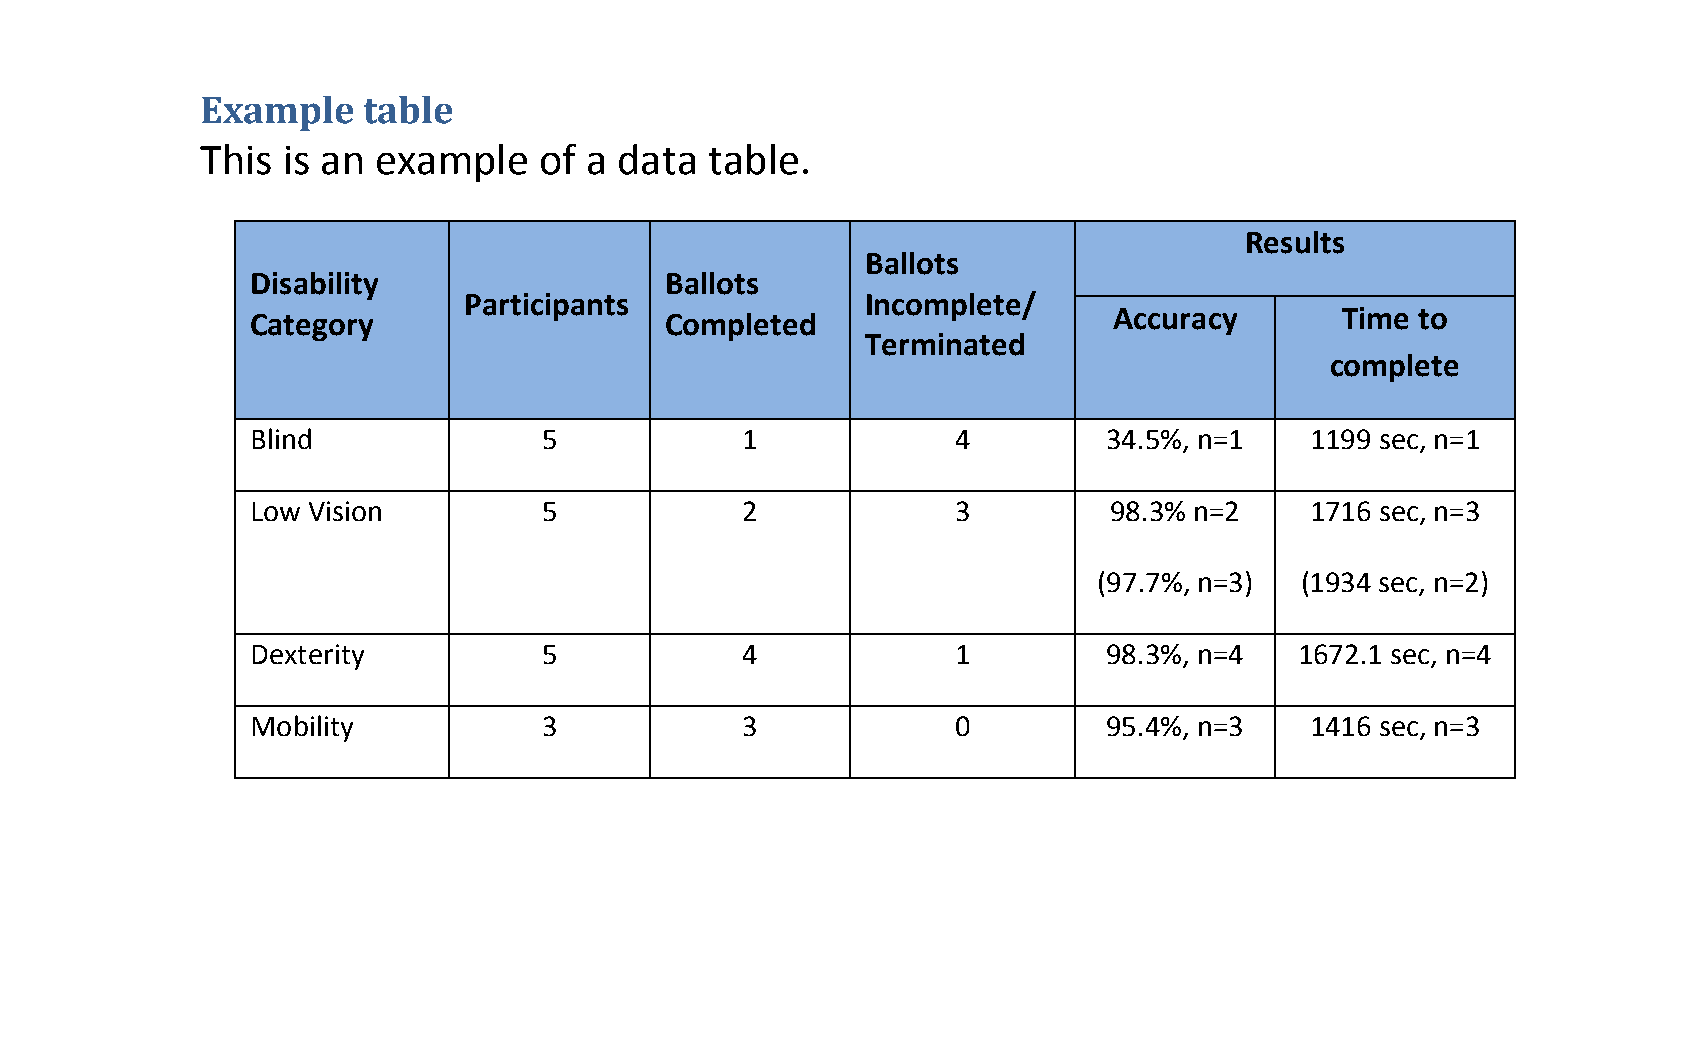

{
  "pdf_path": "table.pdf",
  "page_number": 0,
  "bbox": [
    0,
    65,
    612.0,
    440
  ],
  "text": [
    {
      "text": "Example table",
      "fontname": "UJIRXF+Cambria-Bold",
      "size": 14.039999999999964,
      "x0": 72.0,
      "top": 98.23476000000005,
      "x1": 163.31616,
      "bottom": 112.27476000000001
    },
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 114.69623999999999,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.76800000000003
 

In [ ]:
import json

# Example: pretend these coordinates came from UI/user
page_number = 0

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    bbox = (0, 65, page.width, 440)  # x0, top, x1, bottom
    display(page.crop(bbox).to_image(resolution=200))

result = extract_bbox_metadata(pdf_path, page_number=page_number, bbox=bbox)
print(json.dumps(result, indent=2))

In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    print("Lines:", len(page.lines))
    print("Rects:", len(page.rects))
    print("Curves:", len(page.curves))

Lines: 23
Rects: 2
Curves: 1


In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]

    raw_rects = page.rects
    rects = filter_candidate_cells(raw_rects)
    print("Total rects:", len(rects))

    # show first 10 rects only
    for r in rects[:10]:
        print({
            "x0": r["x0"],
            "top": r["top"],
            "x1": r["x1"],
            "bottom": r["bottom"],
            "width": r["width"],
            "height": r["height"]
        })

Total rects: 2
{'x0': 54.5625, 'top': 193.0, 'x1': 558.5955799999999, 'bottom': 215.32142999999996, 'width': 504.0330799999999, 'height': 22.321429999999964}
{'x0': 123.5, 'top': 588.5, 'x1': 397.5, 'bottom': 696.69118, 'width': 274.0, 'height': 108.19118}


CLI Creation

In [ ]:
%%writefile extract_bbox_metadata.py
import argparse
import json
from collections import Counter

import pdfplumber
import pandas as pd


# -----------------------------
# Geometry helpers
# -----------------------------

def clamp_bbox_to_page(bbox, page):
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)


def bbox_overlap(a, b):
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0


# -----------------------------
# Text extraction
# -----------------------------

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": []
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: Counter(x).most_common(1)[0][0],
                  "size": lambda x: Counter(x).most_common(1)[0][0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }


# -----------------------------
# Image extraction
# -----------------------------

def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])
            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "image_count": len(results),
            "images": results
        }


# -----------------------------
# Table detection signal
# -----------------------------

def extract_bbox_table_signal(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        return {
            "lines_count": len(cropped.lines),
            "rects_count": len(cropped.rects),  # RAW rects (intentional)
            "curves_count": len(cropped.curves),
            "likely_table": (len(cropped.lines) + len(cropped.rects)) > 15
        }


# -----------------------------
# Table cell extraction
# -----------------------------

def filter_candidate_cells(rects, min_w=20, min_h=12):
    candidates = []
    for r in rects:
        w = r["width"]
        h = r["height"]

        if w < 2 or h < 2:
            continue

        if w >= min_w and h >= min_h:
            candidates.append(r)

    return candidates


def extract_table_cells_from_rects(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        rects = filter_candidate_cells(cropped.rects)

        cells = []
        for i, r in enumerate(rects):
            cell_bbox = (r["x0"], r["top"], r["x1"], r["bottom"])

            text_part = extract_bbox_text_metadata(
                pdf_path, page_number, cell_bbox
            )

            cell_text = " ".join(
                line["text"] for line in text_part.get("lines", [])
            )

            cells.append({
                "cell_id": i,
                "bbox": cell_bbox,
                "text": cell_text,
                "text_lines": text_part.get("lines", [])
            })

        return cells


# -----------------------------
# Unified extraction
# -----------------------------

def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_signal = extract_bbox_table_signal(pdf_path, page_number, bbox)

    tables = []
    if table_signal["likely_table"]:
        tables.append({
            "table_id": 0,
            "cells": extract_table_cells_from_rects(
                pdf_path, page_number, bbox
            )
        })

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),

        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),

        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),

        "tables": tables,
        "table_signal": table_signal
    }


# -----------------------------
# CLI
# -----------------------------

def main():
    parser = argparse.ArgumentParser(
        description="Extract metadata from a PDF region (bbox)"
    )

    parser.add_argument("--pdf", required=True)
    parser.add_argument("--page", type=int, required=True)
    parser.add_argument(
        "--bbox",
        nargs=4,
        type=float,
        required=True,
        metavar=("x0", "top", "x1", "bottom")
    )
    parser.add_argument("--out", default=None)

    args = parser.parse_args()
    print("ARGS:", args)

    result = extract_bbox_metadata(
        args.pdf,
        args.page,
        tuple(args.bbox)
    )

    if args.out:
        with open(args.out, "w") as f:
            json.dump(result, f, indent=2)
        print(f"Saved output to {args.out}")
    else:
        print(json.dumps(result, indent=2))


if __name__ == "__main__":
    main()

Overwriting extract_bbox_metadata.py


In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    W, H = page.width, page.height

!python extract_bbox_metadata.py --pdf "{pdf_path}" --page 0 --bbox 0 120 {W} 420

ARGS: Namespace(pdf='table.pdf', page=0, bbox=[0.0, 120.0, 612.0, 420.0], out=None)
{
  "pdf_path": "table.pdf",
  "page_number": 0,
  "bbox": [
    0,
    120.0,
    612.0,
    420.0
  ],
  "text": [
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 120.0,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.76800000000003
    },
    {
      "text": "Disability Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 90.0,
      "top": 161.0879999